In [1]:
import sys
import subprocess

# This forces the notebook to install the packages into its own active environment
subprocess.check_call([sys.executable, "-m", "pip", "install", "smolagents[mcp]"])

# IMPORTANT: After this runs, click "Restart Kernel" in your notebook toolbar!

0

In [ ]:
from typing import Callable


class Tool:
    """
    A class representing a reusable piece of code (Tool).

    Attributes:
        name (str): Name of the tool.
        description (str): A textual description of what the tool does.
        func (callable): The function this tool wraps.
        arguments (list): A list of arguments.
        outputs (str or list): The return type(s) of the wrapped function.
    """
    def __init__(self,
                 name: str,
                 description: str,
                 func: Callable,
                 arguments: list,
                 outputs: str):
        self.name = name
        self.description = description
        self.func = func
        self.arguments = arguments
        self.outputs = outputs

    def to_string(self) -> str:
        """
        Return a string representation of the tool,
        including its name, description, arguments, and outputs.
        """
        args_str = ", ".join([
            f"{arg_name}: {arg_type}" for arg_name, arg_type in self.arguments
        ])

        return (
            f"Tool Name: {self.name},"
            f" Description: {self.description},"
            f" Arguments: {args_str},"
            f" Outputs: {self.outputs}"
        )

    def __call__(self, *args, **kwargs):
        """
        Invoke the underlying function (callable) with provided arguments.
        """
        return self.func(*args, **kwargs)

import inspect

def tool(func):
    """
    A decorator that creates a Tool instance from the given function.
    """
    # Get the function signature
    signature = inspect.signature(func)

    # Extract (param_name, param_annotation) pairs for inputs
    arguments = []
    for param in signature.parameters.values():
        annotation_name = (
            param.annotation.__name__
            if hasattr(param.annotation, '__name__')
            else str(param.annotation)
        )
        arguments.append((param.name, annotation_name))

    # Determine the return annotation
    return_annotation = signature.return_annotation
    if return_annotation is inspect._empty:
        outputs = "No return annotation"
    else:
        outputs = (
            return_annotation.__name__
            if hasattr(return_annotation, '__name__')
            else str(return_annotation)
        )

    # Use the function's docstring as the description (default if None)
    description = func.__doc__ or "No description provided."

    # The function name becomes the Tool name
    name = func.__name__

    # Return a new Tool instance
    return Tool(
        name=name,
        description=description,
        func=func,
        arguments=arguments,
        outputs=outputs
    )

In [4]:
@tool
def calculator(a: int, b: int) -> int:
    """Multiply two integers."""
    return a * b

print(calculator.to_string())

Tool Name: calculator, Description: Multiply two integers., Arguments: a: int, b: int, Outputs: int


tool.py:   0%|          | 0.00/635 [00:00<?, ?B/s]

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen3-Next-80B-A3B-Thinking ───────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "A luxurious superhero-themed party at Wayne Manor, featuring made-up superheroes such as Aurora (a     
  glowing silver and gold suit emitting light beams), Chronos (a clock-themed costume with intricate gears and a   
  time-traveling device), Gale (a wind-themed outfit with flowing fabric and a cape), and Vox (a                   
  microphone-shaped helmet emitting sound waves). The grand ballroom has marble floors, crystal chandeliers, and   
  a Bat-symbol on the wall. Gourmet food stations, a DJ booth with a Bat-symbol, and guests mingling under         
  sparkling lights. High-resolution, photorealistic, cinematic lighting, detailed textures, vibrant colors."       
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024 at 0x207696ACAA0>

[Step 1: Duration 18.16 seconds| Input tokens: 2,111 | Output tokens: 1,591]

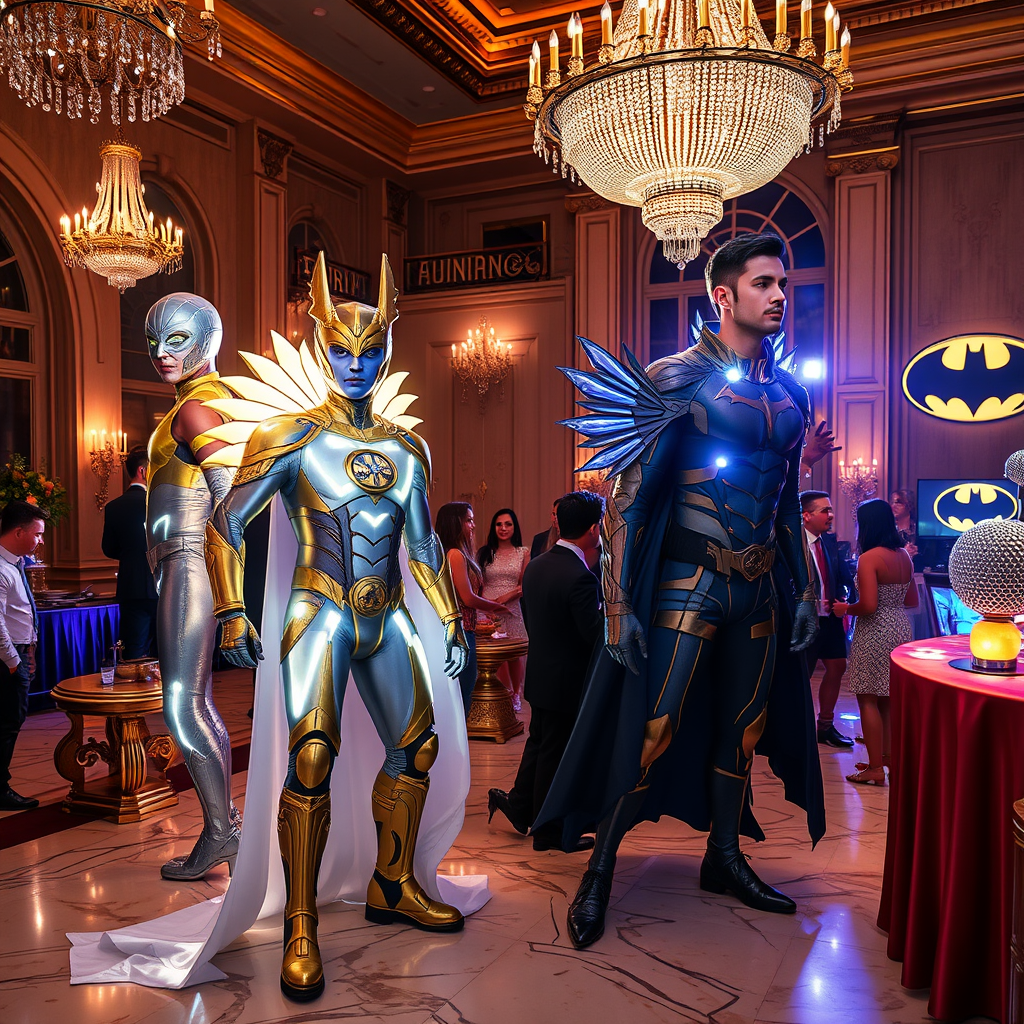

In [1]:
from smolagents import load_tool, CodeAgent, InferenceClientModel

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=InferenceClientModel()
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

In [2]:
import os
from smolagents import ToolCollection, CodeAgent
from mcp import StdioServerParameters
from smolagents import InferenceClientModel


model = InferenceClientModel("Qwen/Qwen2.5-Coder-32B-Instruct")


server_parameters = StdioServerParameters(
    command="uvx",
    args=["--quiet", "pubmedmcp@0.1.3"],
    env={"UV_PYTHON": "3.12", **os.environ},
)

with ToolCollection.from_mcp(server_parameters, trust_remote_code=True) as tool_collection:
    agent = CodeAgent(tools=[*tool_collection.tools], model=model, add_base_tools=True)
    agent.run("Please find a remedy for hangover.")

c:\Program Files\Python312\Lib\contextlib.py:137: FutureWarning: Parameter 'structured_output' was not specified. Currently it defaults to False, but in version 1.25, the default will change to True. To suppress this warning, explicitly set structured_output=True (new behavior) or structured_output=False (legacy behavior). See documentation at https://huggingface.co/docs/smolagents/tutorials/tools#structured-output-and-output-schema-support for more details.
  return next(self.gen)
Exception in thread Thread-5 (_run_loop):
Traceback (most recent call last):
  File "C:\Users\Jakaria.Ahmed\AppData\Roaming\Python\Python312\site-packages\mcp\os\win32\utilities.py", line 169, in create_windows_process
    process = await anyio.open_process(
              ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Jakaria.Ahmed\AppData\Roaming\Python\Python312\site-packages\anyio\_core\_subprocesses.py", line 190, in open_process
    return await get_async_backend().open_process(
           ^^^^^^^^^^^^^^^^^

TimeoutError: Couldn't connect to the MCP server after 30 seconds

In [7]:
!pip install "smolagents[mcp]"

^C


Defaulting to user installation because normal site-packages is not writeable
  Using cached mcpadapt-0.1.20-py3-none-any.whl.metadata (8.1 kB)
  Using cached jsonref-1.1.0-py3-none-any.whl.metadata (2.7 kB)
Using cached mcpadapt-0.1.20-py3-none-any.whl (19 kB)
Using cached jsonref-1.1.0-py3-none-any.whl (9.4 kB)

   -------------------- ------------------- 1/2 [mcpadapt]
   ---------------------------------------- 2/2 [mcpadapt]

